# Visualization notebook
In this notebook, we're gonna visualize an example set of statistics outputted by the results comparison script. For this, we're going to use `plotnine`, a wrapper on matplotlib that aims to copy the syntax from R's `ggplot2`. So if you haven't done so already, be sure to download `plotnine` by one of the following commands: 
<br><br>`pip install plotnine` <br><br>OR<br><br>`conda install plotnine -c conda-forge`.

If you're not previously familiar with neither ggplot2 or plotnine, then I suggest reading their documentation on https://ggplot2.tidyverse.org/ and https://plotnine.readthedocs.io/en/stable/index.html respectfully, and also learning about the [grammar of graphics](https://cfss.uchicago.edu/notes/grammar-of-graphics/).

You're free to create your own visualizations and copy this notebook! I personally make them in R, not in Python, but it's also doable here.

## Import modules

In [53]:
import pandas as pd
from plotnine import *

## Data preprocessing
At first, import the data. In this notebook, we're using the example data that is provided with the repo ("output/output_table_example_long.csv"), but feel free to make a new notebook and use your own output files.

In [54]:
results_df = pd.read_csv("output/output_table_example_long.csv", sep = ';')

Now we're also preprocessing the results for visualization. 3 things are done in the following cell:
<ul>
    <li>Create a Kolmogorov-Smirnov test pass column</li>
    <li>Change LAU level strings to include "LAU" for readability</li>
    <li>Add a time granularity column</li>
</ul>

In [55]:
# KS-test Pass: True or False
results_df['ks_test_pass'] = results_df['ks_test_p']>0.05

# LAU level: 0 -> LAU 0 etc.
results_df['lau_level'] = results_df['lau_level'].apply(lambda x: "LAU " + str(x))

# Time Granularity: table name = results_yearly_table -> time granularity = yearly
results_df['time_granularity'] = results_df['table_name'].apply(lambda x: x.split('_')[1])

See the dataframe's first 5 rows:

In [56]:
results_df.head()

,table_name,data_type,indicator,lau_level,combination_coverage,ks_test_D,ks_test_p,indicator_mean,indicator_mad,APE_mean,APE_mad,ALE_mean,ALE_mad,ks_test_pass,time_granularity
0,results_yearly_table,5% Comp1 data,feature_cnt,LAU 0,1.0000,0.666667,7.859014e-03,410588.3333,172107.0,56.8718,17.0977,0.4538,0.2388,False,yearly
1,results_yearly_table,5% Comp1 data,feature_cnt,LAU 1,1.0000,0.400000,2.979983e-13,27372.5556,7345.0,59.9508,14.4196,0.4820,0.1994,False,yearly
2,results_yearly_table,5% Comp1 data,feature_cnt,LAU 2,0.9646,0.249575,1.665335e-15,2812.2489,570.5,71.0035,19.0739,0.5461,0.2327,False,yearly
3,results_yearly_table,5% Comp1 data,feature_cnt,LAU 3,0.4120,0.448576,0.000000e+00,93.8090,10.0,192.0862,39.2125,0.5575,0.2687,False,yearly
4,results_yearly_table,5% Comp1 data,unique_usr_cnt,LAU 0,1.0000,0.666667,7.859014e-03,410588.3333,172107.0,56.8718,17.0977,0.4538,0.2388,False,yearly


## Create plots
### Combination coverage
In the next cell, we are creating a plot to visualize the combination coverage depending on the LAU level and data type in the results. 

The LAU level will be a facet variable (a new window for each LAU level value) and data type will be colored (a different color for each data type value). 

Jitter points and a boxplot will be added for every LAU level and data type combination and a horizontal line is drawn at 1 to show the "100% combinations line" that every comparable result set should strive for.

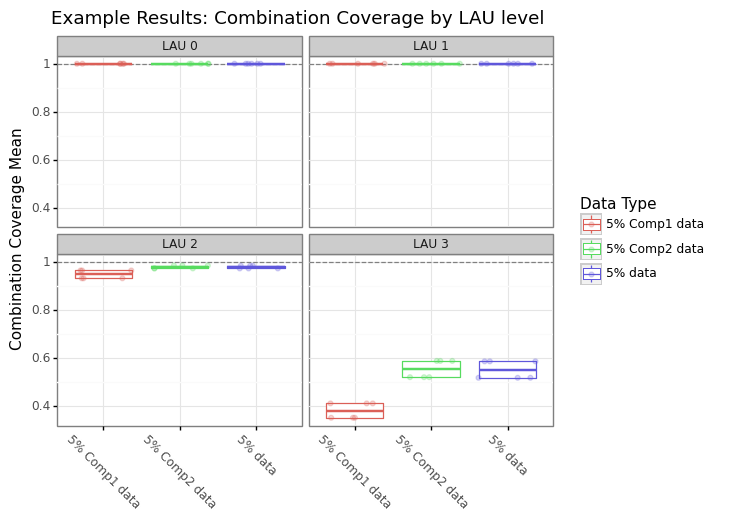

<ggplot: (8792059315770)>

In [57]:
combination_coverage_fig = (
    ggplot(data = results_df, mapping = aes(x = "data_type", y = "combination_coverage", color = "data_type")) +
    geom_hline(yintercept = 1, linetype = "dashed", color = "gray") +
    theme_bw() +
    geom_boxplot() +
    geom_jitter(alpha = 0.25, position = "jitter") +
    scale_x_discrete(name = "") +
    facet_wrap("lau_level", nrow = 2) +
    labs(y = "Combination Coverage Mean", color = "Data Type") +
    ggtitle("Example Results: Combination Coverage by LAU level") +
    theme(axis_text_x=element_text(rotation=-45, hjust=-1))
)
combination_coverage_fig

### Kolmogorov-Smirnov tests
Here we're just counting the number of occurences that an indicator passes the Kolmogorov-Smirnov test. 

LAU levels and data types will be faceting variables and the KS-test pass will be a color (Red: False, Blue: True).

The number of occurences for an indicator in a LAU level and data type facet will depend on the number of tables. The number of tables used in the example data is just 2, therefore there are just 2 possible occurrences for each facet and indicator.

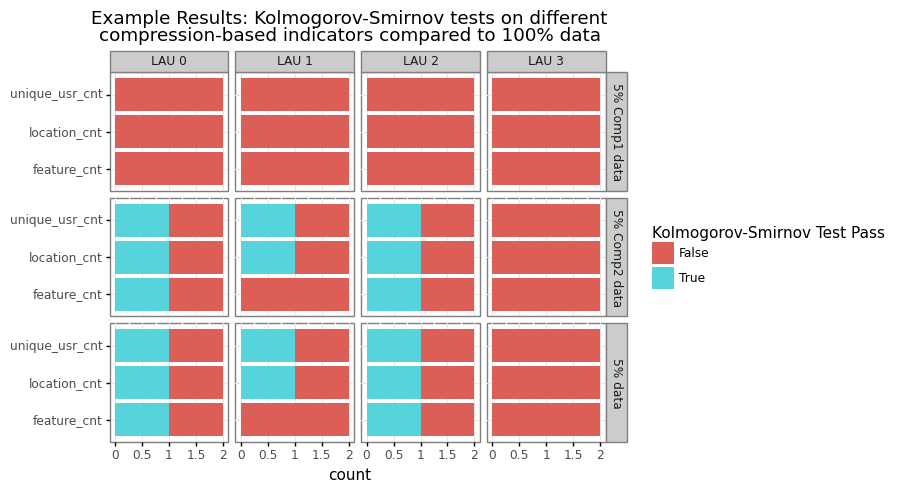

<ggplot: (8792085912826)>

In [58]:
ks_test_fig = (
    ggplot(data = results_df, mapping = aes(x = "indicator", fill = "ks_test_pass")) +
    geom_bar(stat = "count") +
    theme_bw() +
    facet_grid("data_type ~ lau_level") +
    coord_flip() +
    scale_fill_discrete(name = "Kolmogorov-Smirnov Test Pass") +
    labs(x = "") +
    ggtitle("Example Results: Kolmogorov-Smirnov tests on different\ncompression-based indicators compared to 100% data")
)
ks_test_fig


### Mean Absolute Percentage Error
The next cell is for visualizing the mean absolute percentage error that each indicator has depending on the LAU level and data type.

LAU levels and data types will be faceting variables and the KS-test pass will be a color (Red: False, Blue: True).

The x-axis denotes the mean absolute percentage error in percentages. Meaning that if it is 100, it's actually 100%. This "%" label is missing due to constraints in Python.

For each facet, there are 2 point geometries, since 2 tables were used in the calculation of example results.

The main idea here is that as you raise the spatial accuracy (smaller LAU units e.g. using LAU 3), the bigger the mean absolute percentage error is. LAU 0 should have the smallest error.

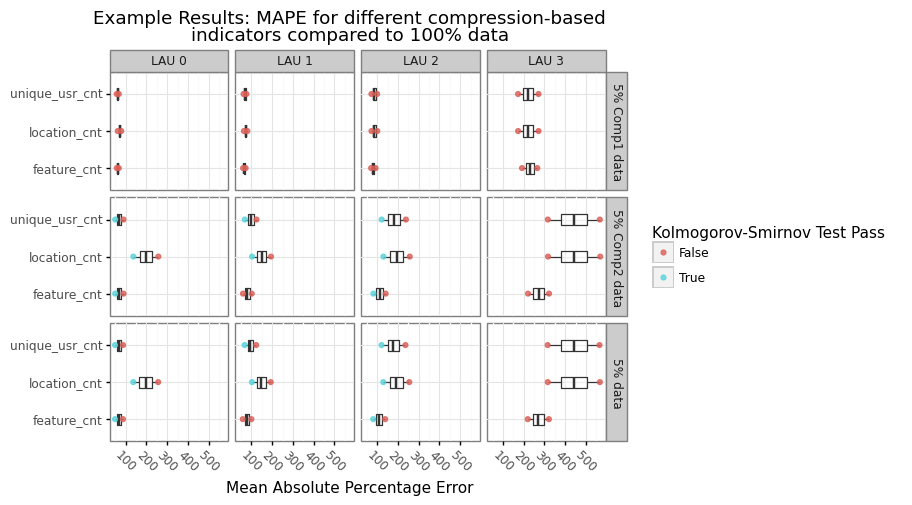

<ggplot: (8792076793245)>

In [59]:
mape_fig = (
    ggplot(data = results_df, mapping = aes(x = "indicator", y = "APE_mean")) +
    geom_boxplot(alpha = 0.3, width = 0.3) +
    geom_point(alpha = 0.8, mapping = aes(color = "ks_test_pass"), size = 1.5) +
    theme_bw() +
    facet_grid("data_type ~ lau_level") +
    coord_flip() +
    scale_x_discrete() +
    scale_color_discrete(name = "Kolmogorov-Smirnov Test Pass") +
    ggtitle("Example Results: MAPE for different compression-based\nindicators compared to 100% data") +
    labs(y = "Mean Absolute Percentage Error", x = "") +
    theme(axis_text_x=element_text(rotation=-45, hjust=-1))
)
mape_fig

### Indicator KS-tests
Here we're creating a matrix of indicators and showing whether they pass the Kolmogorov-Smirnov test depending on LAU level, data type and time granularity.

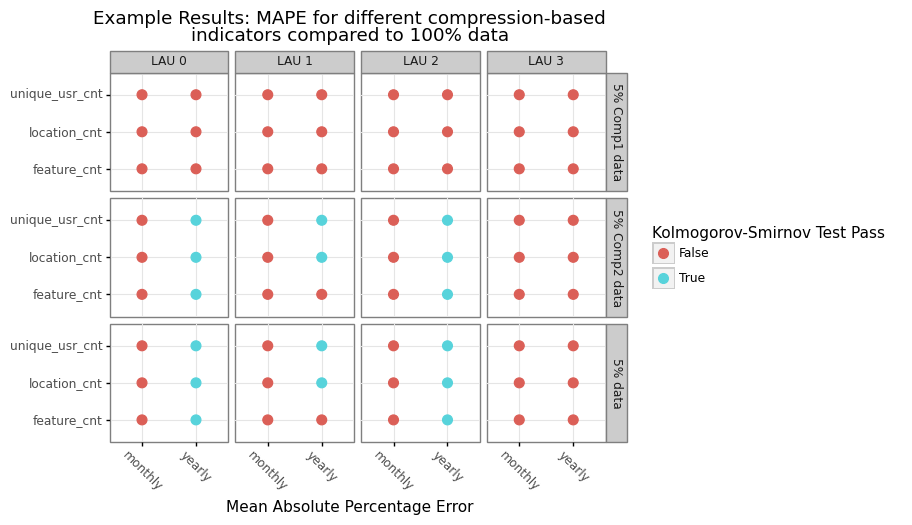

<ggplot: (8792086057361)>

In [60]:
indicator_ks_fig = (
    ggplot(data = results_df, mapping = aes(x = "indicator", y = "time_granularity", color = "ks_test_pass")) +
    geom_point(size = 3.5) +
    theme_bw() +
    scale_y_discrete() +
    facet_grid("data_type ~ lau_level") +
    scale_color_discrete(name = "Kolmogorov-Smirnov Test Pass") +
    ggtitle("Example Results: MAPE for different compression-based\nindicators compared to 100% data") +
    labs(y = "Mean Absolute Percentage Error", x = "") +
    coord_flip() +
    theme(axis_text_x=element_text(rotation=-45, hjust=-1))
)
indicator_ks_fig